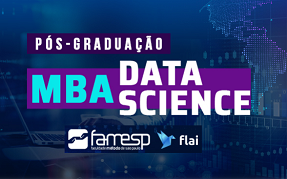

### **Projeto da Disciplina de Machine Learning**
Lidiane RL Baumgratz

O problema de negócio que será abordado é a alta taxa de churn em uma empresa de telecomunicações. O churn representa o cancelamento dos serviços pelos clientes, o que afeta diretamente a receita e a lucratividade da empresa. O objetivo é desenvolver um modelo de Machine Learning que possa prever quais clientes têm maior probabilidade de churn, permitindo que a empresa adote ações preventivas para reduzir a rotatividade e melhorar a retenção de clientes.

Será utilizada uma base de dados da empresa de telecomunicações contendo informações relevantes, como histórico de contratos, serviços utilizados, interações com o atendimento ao cliente, entre outros. Esses dados serão essenciais para treinar o modelo de Machine Learning e identificar padrões que indiquem a probabilidade de churn.
Estas são as principais etapas executadas:

Importação de Bibliotecas: Começamos importando várias bibliotecas, incluindo Pandas, Scikit-Learn, NumPy, Seaborn e Matplotlib para análise de dados e visualização.

Carregamento de Dados: O conjunto de dados é carregado a partir de um arquivo Excel chamado "Telco_customer_churn.xlsx".

Limpeza de Dados: Algumas colunas não relevantes são eliminadas, incluindo a coluna "Churn Reason".

Análise Exploratória de Dados (EDA): Estatísticas descritivas são calculadas para as variáveis numéricas. Plotamos Histogramas das variáveis numéricas e criamos gráficos de barras para variáveis categóricas.

Pré-processamento de Dados: Convertemos variáveis categóricas em representações numéricas usando codificação one-hot (get_dummies). Reordenamos as colunas e o conjunto de dados está pronto para treinamento dos modelos.

O conjunto de dados é dividido em conjuntos de treinamento (X_train, Y_train) e teste (X_test, Y_test).

Utilizamos o Modelo de Regressão Logística, SVM, Árvore de Decisão e KNN, todos são treinados e avaliados de forma muito semelhante (talvez devido ao tamanho reduzido da amostra)

Avaliação dos resultados: São gerados relatórios de classificação e plotadas matrizes de confusão para cada modelo.

A matriz de confusão é usada para avaliar os verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.


In [ ]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_excel("Telco_customer_churn.xlsx")
df.shape

(7043, 33)

In [ ]:
colunas_para_eliminar = ['Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude']
df = df.drop(colunas_para_eliminar, axis=1)

In [ ]:
df.tail()

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7038,2569-WGERO,Female,No,No,No,72,Yes,No,No,No internet service,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,Male,No,No,No,66,Yes,No,Fiber optic,Yes,...,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


In [ ]:
df.size

176075

In [ ]:
df.dtypes

CustomerID            object
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Gender             7043 non-null   object 
 2   Senior Citizen     7043 non-null   object 
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure Months      7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Online Backup      7043 non-null   object 
 11  Device Protection  7043 non-null   object 
 12  Tech Support       7043 non-null   object 
 13  Streaming TV       7043 non-null   object 
 14  Streaming Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless Billing  7043 

In [ ]:
df.isnull().sum()

CustomerID              0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [ ]:
df = df.drop("Churn Reason", axis=1)

In [ ]:
df.isnull().sum()

CustomerID           0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df["Total Charges"].dtype

dtype('O')

In [ ]:
df["Total Charges"] = pd.to_numeric(df["Total Charges"],errors = "coerce")

In [ ]:
df["Total Charges"].dtype

dtype('float64')

In [ ]:
categorical_features = [
    'Gender',
    'Senior Citizen',
    'Partner',
    'Dependents',
    'Phone Service',
    'Internet Service',
    'Online Security',
    'Online Backup',
    'Device Protection',
    'Tech Support',
    'Streaming TV',
    'Streaming Movies',
    'Contract',
    'Paperless Billing',
    'Payment Method',
    ]
numerical_features = ['Tenure Months','Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']
target = "Churn Label"

In [ ]:
df.skew(numeric_only= True)

Tenure Months      0.239540
Monthly Charges   -0.220524
Total Charges      0.961642
Churn Value        1.063031
Churn Score       -0.089840
CLTV              -0.311602
dtype: float64

In [ ]:
df.corr(numeric_only= True)

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
Tenure Months,1.000000,0.247900,0.825880,-0.352229,-0.224987,0.396406
Monthly Charges,0.247900,1.000000,0.651065,0.193356,0.133754,0.098693
Total Charges,0.825880,0.651065,1.000000,-0.199484,-0.124312,0.341837
Churn Value,-0.352229,0.193356,-0.199484,1.000000,0.664897,-0.127463
Churn Score,-0.224987,0.133754,-0.124312,0.664897,1.000000,-0.079782
CLTV,0.396406,0.098693,0.341837,-0.127463,-0.079782,1.000000


In [ ]:
df[numerical_features].describe()

,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV
count,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441,58.699418,4400.295755
std,24.559481,30.090047,2266.771362,21.525131,1183.057152
min,0.000000,18.250000,18.800000,5.000000,2003.000000
25%,9.000000,35.500000,401.450000,40.000000,3469.000000
50%,29.000000,70.350000,1397.475000,61.000000,4527.000000
75%,55.000000,89.850000,3794.737500,75.000000,5380.500000
max,72.000000,118.750000,8684.800000,100.000000,6500.000000


array([[<Axes: title={'center': 'Tenure Months'}>,
        <Axes: title={'center': 'Monthly Charges'}>],
       [<Axes: title={'center': 'Total Charges'}>,
        <Axes: title={'center': 'Churn Score'}>],
       [<Axes: title={'center': 'CLTV'}>, <Axes: >]], dtype=object)

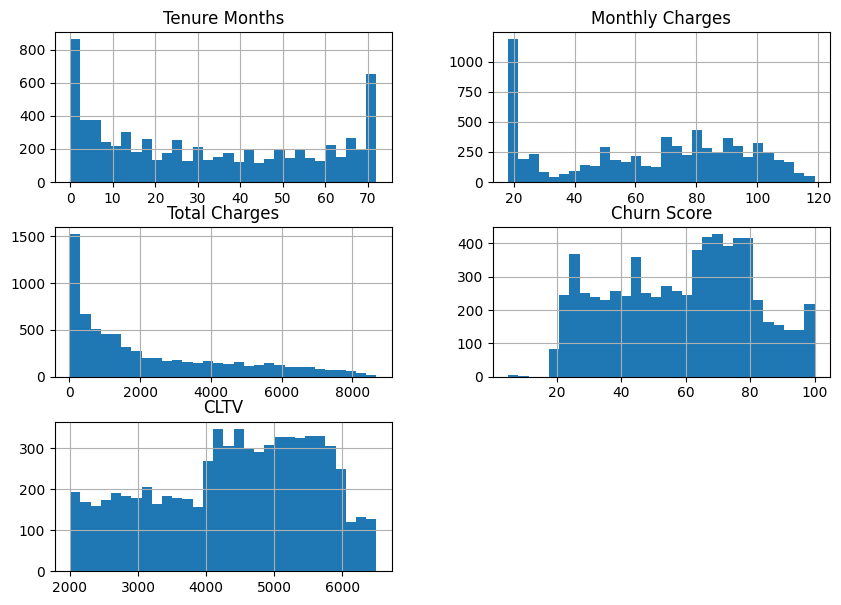

In [ ]:
df[numerical_features].hist(bins=30, figsize=(10,7))

<ipython-input-159-23cc5885acf0>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[df['Churn Label'] == "No"][numerical_features].hist(bins=30, color="blue", alpha=0.5, ax=axes[0])
<ipython-input-159-23cc5885acf0>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[df['Churn Label'] == "Yes"][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=axes[0])


array([[<Axes: title={'center': 'Tenure Months'}>,
        <Axes: title={'center': 'Monthly Charges'}>],
       [<Axes: title={'center': 'Total Charges'}>,
        <Axes: title={'center': 'Churn Score'}>],
       [<Axes: title={'center': 'CLTV'}>, <Axes: >]], dtype=object)

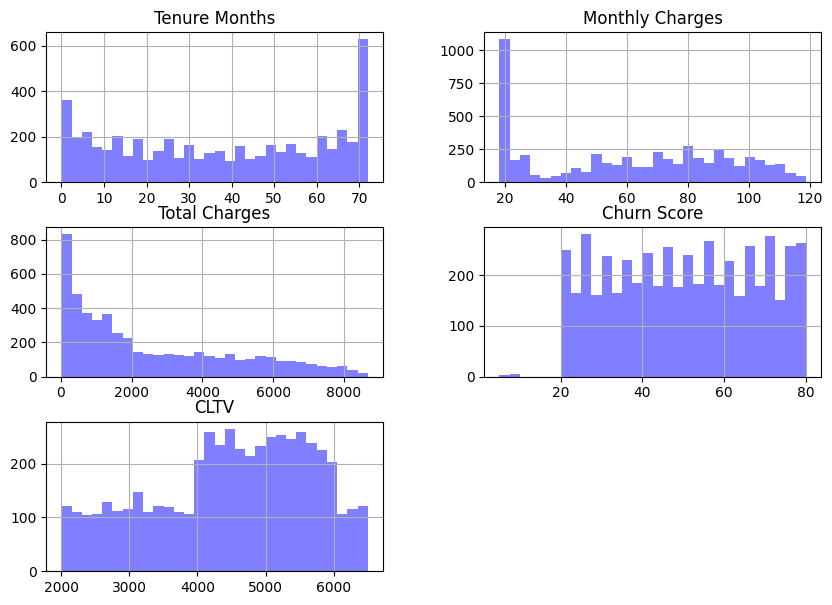

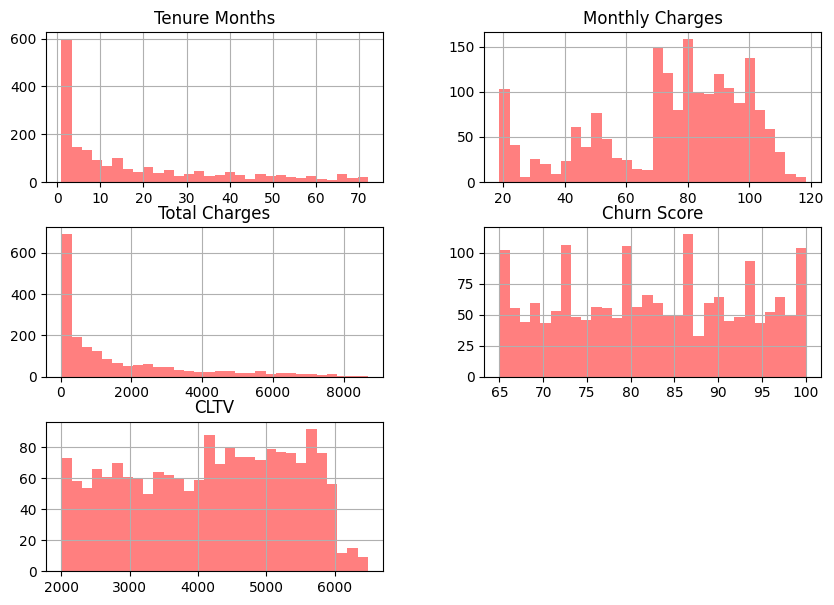

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10, 7))
df[df['Churn Label'] == "No"][numerical_features].hist(bins=30, color="blue", alpha=0.5, ax=axes[0])

fig, axes = plt.subplots(1, 3, figsize=(10, 7))  # Cria uma nova figura
df[df['Churn Label'] == "Yes"][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=axes[0])


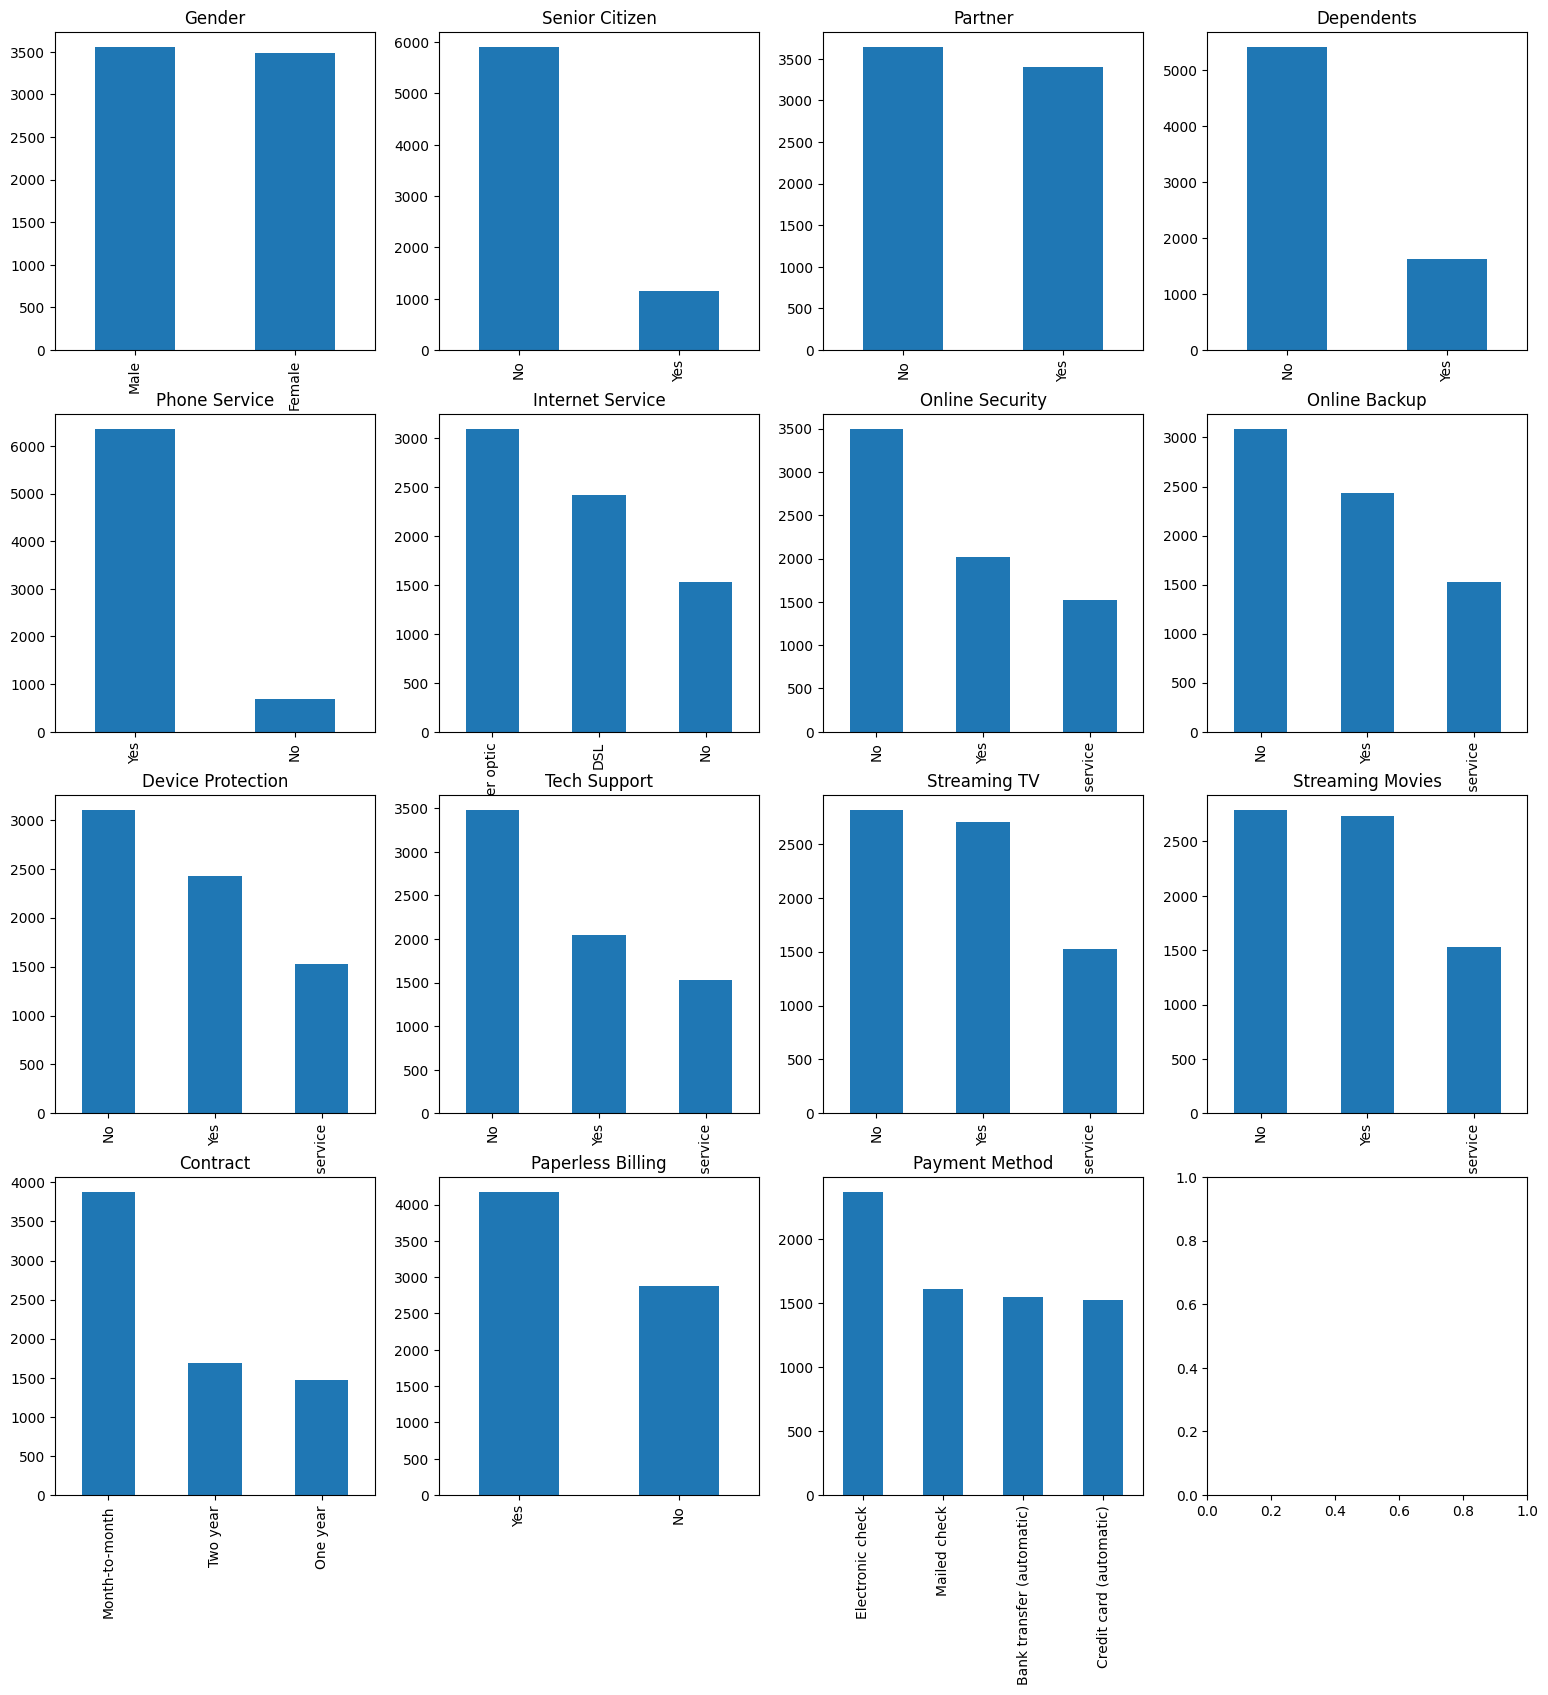

In [ ]:
ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS,COLS, figsize=(19,19))
row, col = 0, 0,
for i, categorical_features in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[categorical_features].value_counts().plot(kind='bar', ax=ax[row, col]).set_title(categorical_features)

Text(0.5, 1.0, 'churned')

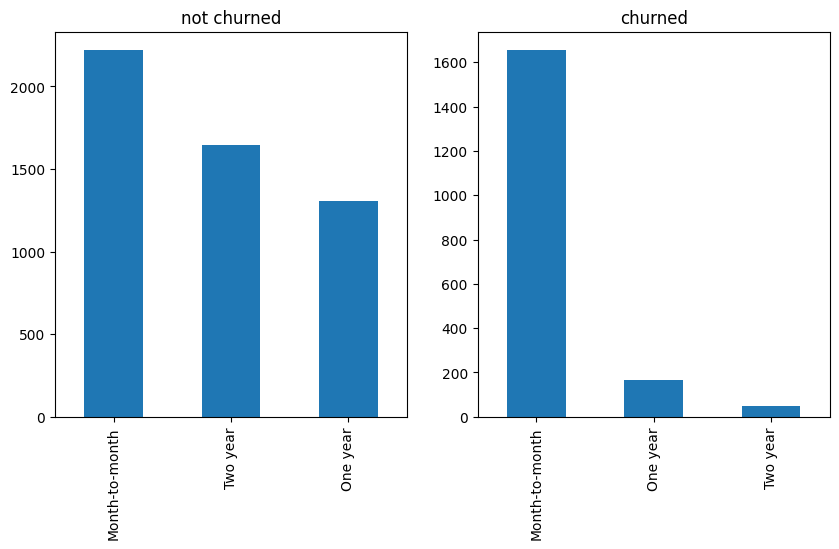

In [ ]:
feature = 'Contract'
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df[df['Churn Label'] =="No"][feature].value_counts().plot(kind='bar', ax=ax[0]).set_title('not churned')
df[df['Churn Label'] =="Yes"][feature].value_counts().plot(kind='bar', ax=ax[1]).set_title('churned')

Text(0.5, 1.0, 'churned')

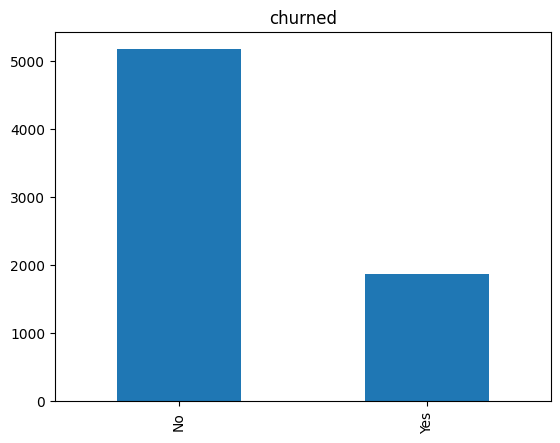

In [ ]:
df[target].value_counts().plot(kind='bar').set_title('churned')

In [ ]:
x = ['Tenure Months','Monthly Charges']
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in x:
    count_outliers(df,i)

No outliers in Tenure Months
No outliers in Monthly Charges


In [ ]:
df.drop(['CustomerID'],axis = 1,inplace = True)

In [ ]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340


In [ ]:
df1=pd.get_dummies(data=df,columns=['Gender',
    'Senior Citizen',
    'Partner',
    'Dependents',
    'Phone Service',
    'Internet Service',
    'Online Security',
    'Online Backup',
    'Device Protection',
    'Multiple Lines',
    'Tech Support',
    'Streaming TV',
    'Streaming Movies',
    'Contract',
    'Paperless Billing',
    'Payment Method',
    'Churn Label'], drop_first=True)

In [ ]:
df1.head()

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,...,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Churn Label_Yes
0,2,53.85,108.15,1,86,3239,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,2,70.70,151.65,1,67,2701,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
2,8,99.65,820.50,1,86,5372,0,0,0,1,...,1,0,1,0,0,1,0,1,0,1
3,28,104.80,3046.05,1,84,5003,0,0,1,1,...,1,0,1,0,0,1,0,1,0,1
4,49,103.70,5036.30,1,89,5340,1,0,0,1,...,1,0,1,0,0,1,0,0,0,1


In [ ]:
df1.columns

Index(['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Churn Score', 'CLTV', 'Gender_Male', 'Senior Citizen_Yes',
       'Partner_Yes', 'Dependents_Yes', 'Phone Service_Yes',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Online Security_No internet service', 'Online Security_Yes',
       'Online Backup_No internet service', 'Online Backup_Yes',
       'Device Protection_No internet service', 'Device Protection_Yes',
       'Multiple Lines_No phone service', 'Multiple Lines_Yes',
       'Tech Support_No internet service', 'Tech Support_Yes',
       'Streaming TV_No internet service', 'Streaming TV_Yes',
       'Streaming Movies_No internet service', 'Streaming Movies_Yes',
       'Contract_One year', 'Contract_Two year', 'Paperless Billing_Yes',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check',
       'Churn Label_Yes'],
      dtype='object')

In [ ]:
df1 = df1[['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Churn Score', 'CLTV', 'Gender_Male', 'Senior Citizen_Yes',
       'Partner_Yes', 'Dependents_Yes', 'Phone Service_Yes',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Online Security_No internet service', 'Online Security_Yes',
       'Online Backup_No internet service', 'Online Backup_Yes',
       'Device Protection_No internet service', 'Device Protection_Yes',
       'Multiple Lines_No phone service', 'Multiple Lines_Yes',
       'Tech Support_No internet service', 'Tech Support_Yes',
       'Streaming TV_No internet service', 'Streaming TV_Yes',
       'Streaming Movies_No internet service', 'Streaming Movies_Yes',
       'Contract_One year', 'Contract_Two year', 'Paperless Billing_Yes',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check',
       'Churn Label_Yes']]

In [ ]:
df1.head()

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,...,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Churn Label_Yes
0,2,53.85,108.15,1,86,3239,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,2,70.70,151.65,1,67,2701,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
2,8,99.65,820.50,1,86,5372,0,0,0,1,...,1,0,1,0,0,1,0,1,0,1
3,28,104.80,3046.05,1,84,5003,0,0,1,1,...,1,0,1,0,0,1,0,1,0,1
4,49,103.70,5036.30,1,89,5340,1,0,0,1,...,1,0,1,0,0,1,0,0,0,1


In [ ]:
df1.shape

(7043, 34)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(df1.drop(['Churn Label_Yes'],axis = 1))
scaled_features = scaler.transform(df1.drop('Churn Label_Yes',axis = 1))

In [ ]:
from sklearn.model_selection import train_test_split
X = scaled_features
Y = df1['Churn Label_Yes']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)

In [ ]:
df = df.dropna()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer  # Para tratar valores NaN

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

logmodel = LogisticRegression()

logmodel.fit(X_train, Y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
X_test = imputer.transform(X_test)
predLR = logmodel.predict(X_test)


In [ ]:
predLR

array([0, 0, 1, ..., 1, 0, 0], dtype=uint8)

In [ ]:
Y_test

5616    0
2937    0
1355    1
5441    0
3333    0
       ..
2797    0
412     1
174     1
5761    0
5895    0
Name: Churn Label_Yes, Length: 2113, dtype: uint8

In [ ]:
print(classification_report(Y_test, predLR))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1553
           1       1.00      1.00      1.00       560

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113



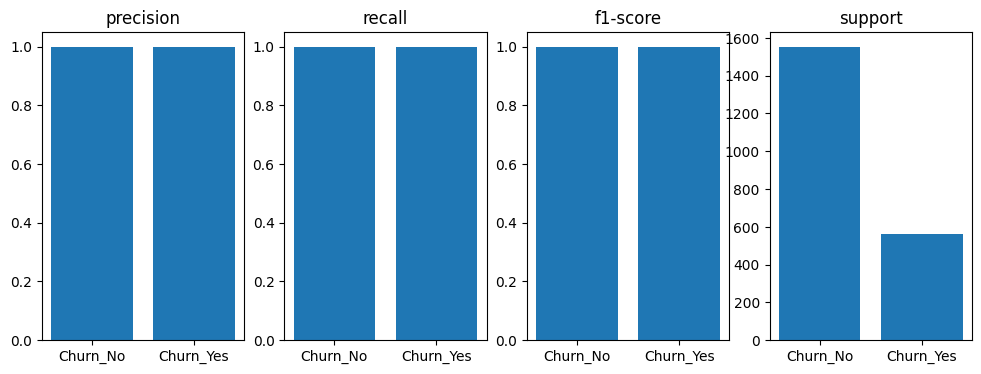

In [ ]:
report = classification_report(Y_test, predLR, target_names=['Churn_No', 'Churn_Yes'])
lines = report.split('\n')
parts = [line.split() for line in lines[2:-5]]
class_metrics = dict()
for part in parts:
    class_metrics[part[0]] = {'precision': float(part[1]), 'recall': float(part[2]), 'f1-score': float(part[3]), 'support': int(part[4])}
fig, ax = plt.subplots(1, 4, figsize=(12, 4))
metrics = ['precision', 'recall', 'f1-score', 'support']
for i, metric in enumerate(metrics):
    ax[i].bar(class_metrics.keys(), [class_metrics[key][metric] for key in class_metrics.keys()])
    ax[i].set_title(metric)
plt.show()

In [ ]:
confusion_matrix_LR = confusion_matrix(Y_test, predLR)

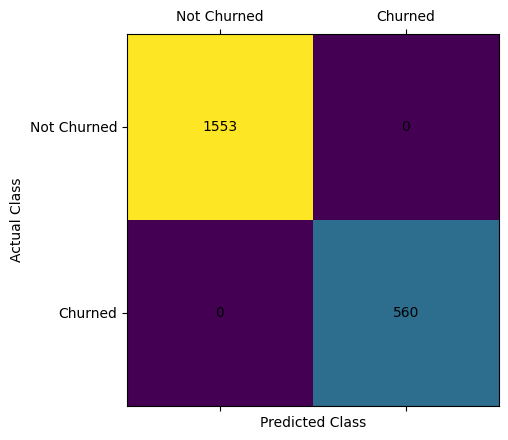

In [ ]:
plt.matshow(confusion_matrix(Y_test, predLR))
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_LR[i, j], ha='center', va='center')
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [ ]:
logmodel.score(X_train, Y_train)

1.0

In [ ]:
accuracy_score(Y_test, predLR)

1.0

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
y_pred_svc = svc.predict(X_test)

In [ ]:
print(classification_report(Y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1553
           1       1.00      1.00      1.00       560

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113



In [ ]:
confusion_matrix_svc = confusion_matrix(Y_test, y_pred_svc)

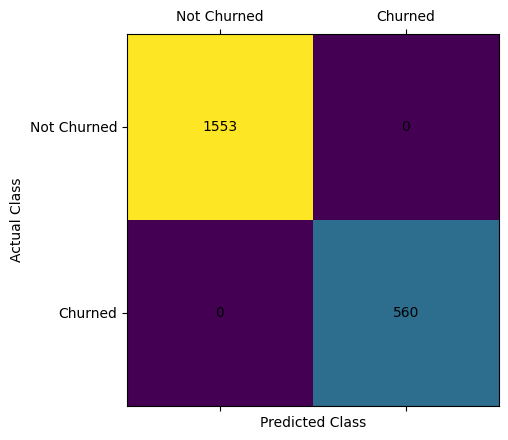

In [ ]:
plt.matshow(confusion_matrix_svc)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_svc[i, j], ha='center', va='center')

plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [ ]:
svc.score(X_train,Y_train)

1.0

In [ ]:
accuracy_score(Y_test, y_pred_svc)

1.0

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
y_pred_dtc = dtc.predict(X_test)

In [ ]:
print(classification_report(Y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1553
           1       1.00      1.00      1.00       560

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=30)

In [ ]:
pred_knn = knn.predict(X_test)

In [ ]:
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

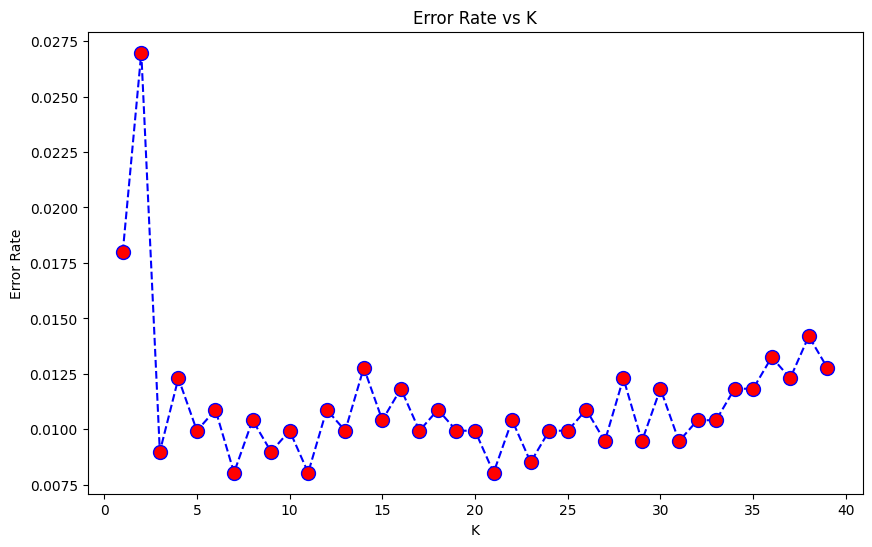

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
print(classification_report(Y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1553
           1       1.00      0.96      0.98       560

    accuracy                           0.99      2113
   macro avg       0.99      0.98      0.98      2113
weighted avg       0.99      0.99      0.99      2113



In [ ]:
confusion_matrix_knn = confusion_matrix(Y_test,pred_knn)

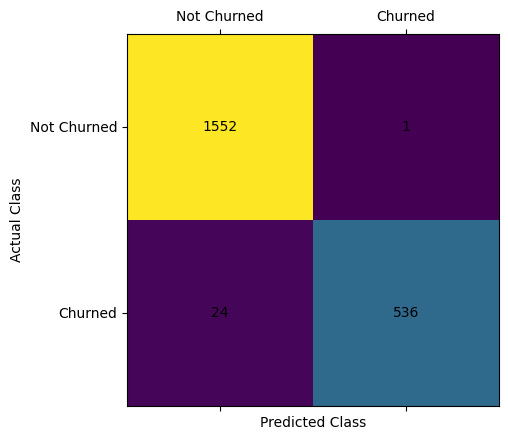

In [ ]:
plt.matshow(confusion_matrix_knn)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_knn[i, j], ha='center', va='center')
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [ ]:
knn.score(X_train,Y_train)

0.9866125760649087

In [ ]:
knn.score(X_train,Y_train)

0.9866125760649087

Um modelo de previsão de rotatividade de clientes (churn) desenvolvido com base nesses dados pode ser usado pela área de negócios de várias maneiras no dia-a-dia.
O modelo pode ser usado para identificar clientes que têm uma alta probabilidade de cancelar seus serviços. Isso permite que a equipe de retenção de clientes e a equipe de Marketing concentre seus esforços em reter esses clientes específicos, com promoções ou condiçoes especiais e incentivos para manter esses clientes. A otimização de preços, a melhoria dos serviços e a previsão de receitas também são areas beneficiadas com esse tipo de análise. Em suma, o modelo de previsão de churn pode ser uma ferramenta valiosa para a área de negócios, auxiliando na tomada de decisões informadas e na implementação de estratégias eficazes para reter clientes. Contribui significativamente para a redução da perda de clientes e o aumento da satisfação do cliente, o que, por sua vez, pode ter um impacto positivo nos resultados financeiros da empresa.

Foram utilizadas as seguintes métricas de avaliação para avaliar o desempenho dos modelos:

Precision (Accuracy): A precision é uma métrica que mede a taxa de classificações corretas em relação ao número total de classificações. É calculada da seguinte forma:

Precision = (Verdadeiros Positivos + Verdadeiros Negativos) / (Total de Amostras)

Classification Report: Inclui várias métricas, como precisão, recall, F1-score e suporte para cada classe (churned e not churned). O relatório é gerado para cada modelo e apresenta uma análise mais detalhada do desempenho.

Confusion Matrix: É uma tabela que mostra o desempenho do modelo ao comparar as classificações reais com as previsões. Ela é usada para calcular outras métricas, como precisão, recall e F1-score. Ela mostra os valores verdadeiros Positivos, Verdadeiros Negativos, Falsos Positivos e Falsos Negativos.
O relatório de classificação fornece uma visão abrangente do desempenho do modelo, enquanto a matriz de confusão detalha os resultados de classificação em termos de verdadeiros e falsos positivos e negativos. Elas juntas ajudam a entender quão bem os modelos estão prevendo a rotatividade de clientes.

Para avaliar se o modelo está funcionando, podemos avaliar o retorno sobre o investimento para implementar um sistema de retenção de clientes com base nas previsões do modelo. Isso pode ser feito da seguinte forma:

Custo da Campanha de Telemarketing: Calculamos o custo total da campanha de telemarketing, incluindo salários, infraestrutura, custo das ligações, etc.Acompanhamos a receita gerada a partir dos clientes que foram contatados e que decidiram permanecer na empresa ou aumentar seus gastos. Comparamos a receita gerada pelo grupo de clientes que recebeu o contato com a central de telemarketing (Grupo 1 e Grupo 2) com a receita gerada pelo grupo de controle (Grupo 3 e Grupo 4), que não recebeu nenhum contato. Calculamos o retorno sobre o investimento subtraindo o custo da campanha da receita gerada e dividindo pelo custo da campanha desta forma:
ROI = [(Receita Gerada - Custo da Campanha) / Custo da Campanha] * 100
Se o ROI for positivo e significativo, isso indicaria que a campanha de telemarketing baseada nas previsões do modelo está gerando um impacto financeiro positivo para a empresa.





